```markdown
## Data Preparation and Initial Analysis

In this section, we import necessary libraries and load the dataset. We perform initial data cleaning by dropping unnecessary columns and renaming others for better readability. We also map categorical variables to numerical values for easier analysis. The first few rows of the cleaned dataset are displayed to give an overview of the data.
```

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

```markdown
## Data Loading and Cleaning

In this section, we load the dataset `Mall_Customers.csv` and perform initial data cleaning. We drop the `CustomerID` column as it is not needed for our analysis. We also rename columns for better readability and map the `Genre` column to numerical values (1 for Male and 0 for Female). The first few rows of the cleaned dataset are displayed to give an overview of the data.
```

In [77]:
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(['CustomerID'], axis=1)
df = df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'})
df['Genre'] = df['Genre'].map({'Male': 1, 'Female': 0})
print(df.head(10))


   Genre  Age  Income  Score
0      1   19      15     39
1      1   21      15     81
2      0   20      16      6
3      0   23      16     77
4      0   31      17     40
5      0   22      17     76
6      0   35      18      6
7      0   23      18     94
8      1   64      19      3
9      0   30      19     72


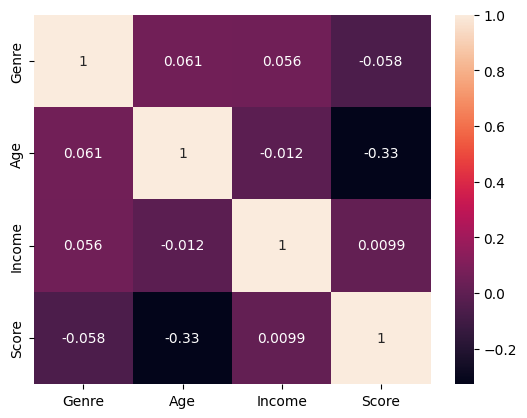

In [83]:
# correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()


```markdown
## Data Visualization and Clustering

In this section, we visualize the data using scatter plots to understand the distribution of customers based on their income and spending score. We also apply the KMeans clustering algorithm to segment the customers into different groups. The centroids of the clusters are plotted to visualize the cluster centers. This helps in identifying distinct customer segments and understanding their characteristics.
```

In [78]:
descriptive_stats = df.describe()
print(descriptive_stats)

            Genre         Age      Income       Score
count  200.000000  200.000000  200.000000  200.000000
mean     0.440000   38.850000   60.560000   50.200000
std      0.497633   13.969007   26.264721   25.823522
min      0.000000   18.000000   15.000000    1.000000
25%      0.000000   28.750000   41.500000   34.750000
50%      0.000000   36.000000   61.500000   50.000000
75%      1.000000   49.000000   78.000000   73.000000
max      1.000000   70.000000  137.000000   99.000000


```markdown
## Data Visualization and Clustering

In this section, we visualize the data using scatter plots to understand the distribution of customers based on their income and spending score. We also apply the KMeans clustering algorithm to segment the customers into different groups. The centroids of the clusters are plotted to visualize the cluster centers. This helps in identifying distinct customer segments and understanding their characteristics.
```

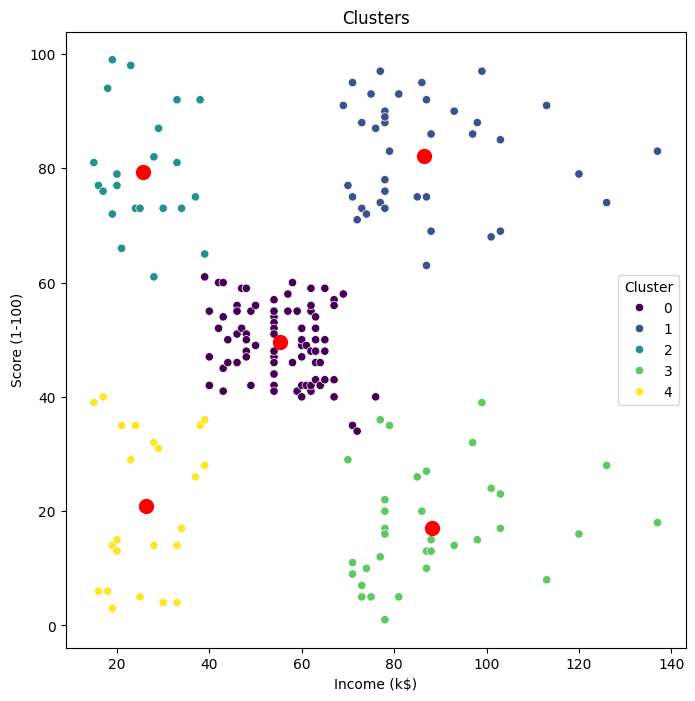

In [92]:
# On crée un modèle de KMeans avec 6 clusters
X = df[['Income', 'Score']]
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
cluster = kmeans.labels_
# Créer un nuage de points pour les variables 'Income' et 'Score' en fonction du 'Genre' et de l''Age'
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='Income', y='Score', hue=cluster, palette='viridis')
plt.title('Clusters')
plt.xlabel('Income (k$)')
plt.ylabel('Score (1-100)')
plt.legend(title='Cluster')

plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='o')
plt.show()


In [80]:
# inertie
inertia = kmeans.inertia_
print(f"Inertie: {inertia}")

Inertie: 44448.45544793371


```markdown
## Elbow Method

The elbow method is used to determine the optimal number of clusters in a dataset. It involves running the KMeans algorithm for an increasing number of clusters and plotting the sum of squared distances (inertia) between each point and the center of its cluster. The point where the inertia starts to decrease significantly indicates the optimal number of clusters.

In the next cell, we applied the elbow method to determine the optimal number of clusters for our dataset `X`. We plotted the inertia against the number of clusters to visualize the "elbow" in the graph.


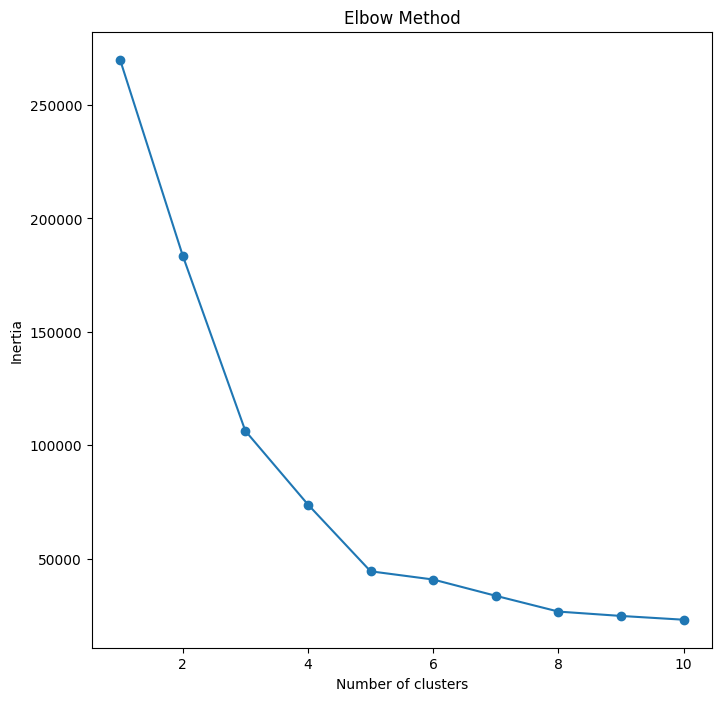

In [81]:
# elbow method
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
plt.figure(figsize=(8, 8))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()